# Titanic Shipwreck Exploration
### by Shubh

## Preliminary Wrangling

In this exploration we are going to analyze Titanic dataset containing survival and other attributes of passengers travelling during the shipwreck, from https://www.kaggle.com/c/titanic/data in which it was divided into two parts, i.e., training set and testing set for the purpose of machine learning analysis but in this project I will choose training set only for the purpose of explanatory analysis.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape)
print(df.dtypes)

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cleaning Data

In [5]:
# Dealing with age missing values
df['Age'].std()

14.526497332334042

In [6]:
# As std in very large
# Fill missing age values using mean and std
mean=df['Age'].mean()
std=df['Age'].std()
lower_bound=round(mean-std,0)
upper_bound=round(mean+std,0)
age_list=[]
count=df['Age'].isnull().sum()
for i in range(0,count):
    age_list.append(random.randint(lower_bound,upper_bound))
age_list=np.array(age_list)
age_values=df['Age'].values
z=0
for i,j in enumerate(age_values):
    if np.isnan(age_values[i]):
        age_values[i]=age_list[z]
        z+=1
df['Age']=age_values
df['Age'].isnull().sum()

0

In [7]:
# Embarked missing value
# as only 2 values are missing we can use the most frequent value to fill these null values
values=df['Embarked'].value_counts()
print(values)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [8]:
df['Embarked']=df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

In [9]:
# Saving cleaned data into new csv file for slide template
df.to_csv('updated.csv')
df=pd.read_csv('updated.csv')
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.619719,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,13.569647,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### What is the structure of your dataset?

>  891 records and 12 features. 

Categorical Features: Nominal(Suvived,Embarked, Sex)   Ordinal(Plcass)



Numerical Features: Discrete(parch, SibSp)    Continous(Age,Fare)

### What is/are the main feature(s) of interest in your dataset?

> The features which can help in finding survival of a passenger are of main interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features that can support me in this investigation are Age, Sex, SibSp, Parch, Pclass. Other features can also support in ins this investigation that we will find as we go with our investigation.

## Univariate Exploration

### Is survival rate was higher than the death rate?

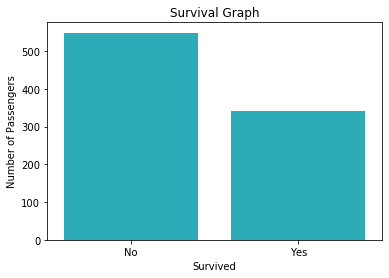

In [10]:
base_color=sb.color_palette()[9]
sb.countplot(data=df,x='Survived',color=base_color)
plt.xticks([0,1],['No','Yes']);
plt.title('Survival Graph');
plt.xlabel('Survived')
plt.ylabel('Number of Passengers');

Here I found number of passengers survived were less than the number of the passengers who died, that were travelling in titanic ship. So, survival rate was lower than death rate.

### What type of ticket majority of passengers were having?


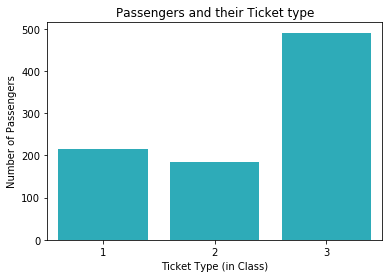

In [11]:
sb.countplot(data=df,x='Pclass',color=base_color);
plt.title('Passengers and their Ticket type');
plt.xlabel('Ticket Type (in Class)')
plt.ylabel('Number of Passengers');

It is visible that number of 3rd class ticket majority of passengers were having.

### What are the age of passengers(in range) travelling in the ship?

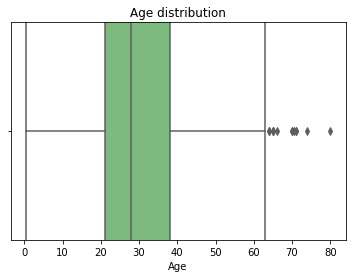

In [12]:
sb.boxplot(x='Age', data=df, palette='Greens', orient='h', width=10)
plt.title("Age distribution");
plt.xlabel('Age');

According to the age distribution box plot, it is seen that 95% of passengers are of age 1-63 years.

### Which major age group were travelling in the ship?

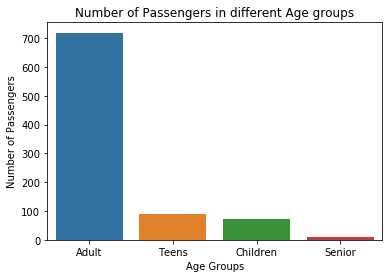

In [13]:
labels=['Children','Teens','Adult','Senior']
bins=[0,13,18,64,np.inf]
df['Age Group']=pd.cut(df['Age'],bins,labels=labels)
ageGroup_values=df['Age Group'].value_counts()
sb.countplot(data=df,x='Age Group',order=ageGroup_values.index);
plt.title('Number of Passengers in different Age groups');
plt.xlabel('Age Groups')
plt.ylabel('Number of Passengers');

It is visible that more than 700 passengers were adults(19-64 years old) which is around of 80% of the total population in the ship.

### Are there were more number of male candidates?

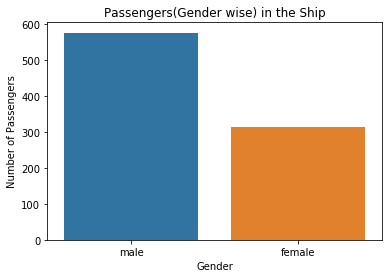

In [14]:
sb.countplot(data=df,x='Sex');
plt.title('Passengers(Gender wise) in the Ship');
plt.xlabel('Gender')
plt.ylabel('Number of Passengers');

Yes, there were more number of male candidates than female candidates in the ship.

### What about travelling partner of passengers?

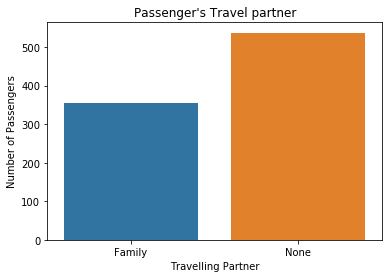

In [15]:
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 0, 1)
travelAlone_values=df['TravelAlone'].value_counts()
sb.countplot(data=df,x='TravelAlone')
plt.xticks([0,1],['Family','None']);
plt.title("Passenger's Travel partner" );
plt.xlabel('Travelling Partner')
plt.ylabel('Number of Passengers');

Number of passengers travelling alone is higher than the people traveling with their families.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since, the age distribution was rightly skewed so for better understanding I categorized age into different age groups, of ages of passengers aborded on the ship. Most of the passengers were of age group 20-40.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I categorized age into different age groups to have better insight of age of passengers. Also, I added the SibSp and parch columns to know and show whether individual is travelling alone or not.

## Bivariate Exploration

#### Correlation between features using heatmap

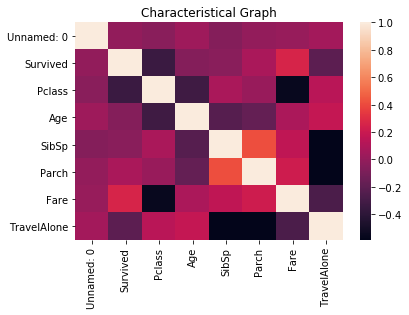

In [16]:
sb.heatmap(df.drop(['PassengerId'], axis=1).corr());
plt.title('Characteristical Graph');

### Were male passengers survived the most?

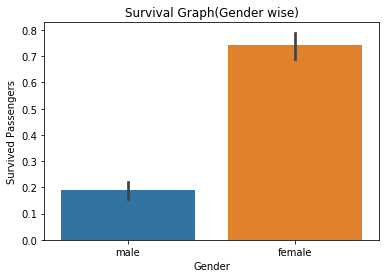

In [17]:
sb.barplot(data=df,x='Sex',y='Survived');
plt.title('Survival Graph(Gender wise)');
plt.xlabel('Gender')
plt.ylabel('Survived Passengers');

No, female candidates were more likely to survive than male candidates.


### What is the survival rate according to their age groups?

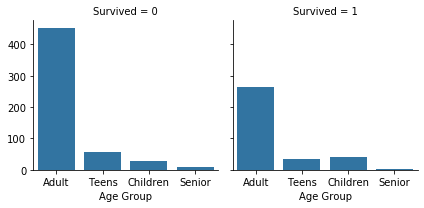

In [18]:
g=sb.FacetGrid(df,col='Survived')
g.map(sb.countplot,'Age Group',order=ageGroup_values.index);

<ul>
    <li>Most adults and teens did not survived
    <li>Most of the children survived
    <li>Senior citizens has low survival rate
</ul>

### What would be the survival rate according to their age?        

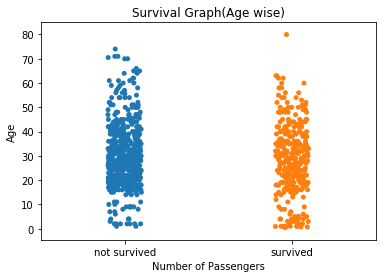

In [19]:
sb.stripplot(data=df,x="Survived", y="Age",jitter=True, );
plt.title('Survival Graph(Age wise)');
plt.xlabel('Number of Passengers')
plt.ylabel('Age');
plt.xticks([1,0],['survived','not survived']);

Approx. 20-50 years old are the ones who survived as well as who not survived. Since not survived graph pattern is little bit more dense, so we conclude that in age of 20-50 years survival rate was high, but their were more factors in deciding that.

### What would be the survival rate according to their ticket type?

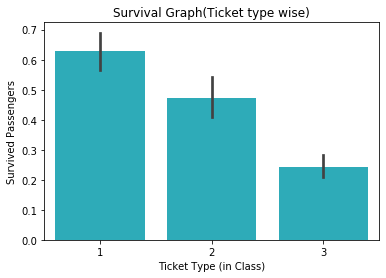

In [20]:
sb.barplot(data=df,x='Pclass',y='Survived',color=base_color);
plt.title('Survival Graph(Ticket type wise)');
plt.xlabel('Ticket Type (in Class)')
plt.ylabel('Survived Passengers');

People with higer class have a good survival rate
<ul>
    <li> In Pclass 1 more than 62% people survived
    <li> In Pclass 2 more than 45% people survived
    <li> In Pclass 3 more than 20% people survived
     
</ul>
        

### What would be the survival rate according to their travelling partner?

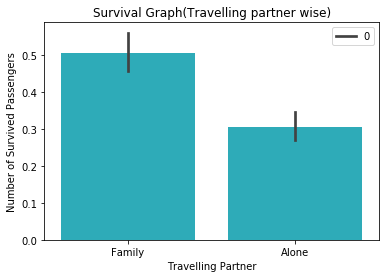

In [21]:
sb.barplot('TravelAlone', 'Survived', data=df, color=base_color);
plt.xticks([0,1],['Family','Alone']);
plt.title('Survival Graph(Travelling partner wise)');
plt.xlabel('Travelling Partner')
plt.ylabel('Number of Survived Passengers');
plt.legend({0:'survived'});

People travelling alone are more likely to die.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Observations:
 1. Males have lower survival rate than females</li>
 2. Teens and adults have low survival rate</li>
 3. Pclass 1 people are more likely to survive</li>
 4. People travelling alone are more likely to die</li>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
SibSp and Parch also have a great impact on survival rate as individual travelling alone have low survival rate.
Also, fare can have a good relationship with survival rate.

## Multivariate Exploration


### What is the relation between survival rate, ticket type and age?

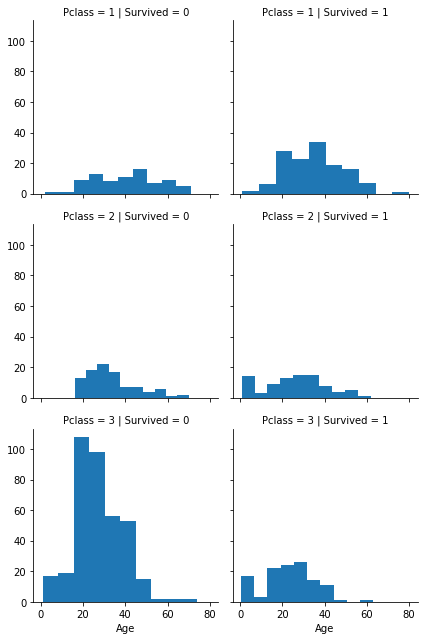

In [22]:
g=sb.FacetGrid(df,col='Survived', row='Pclass');
g.map(plt.hist,'Age');


On an average most of the passengers who are:
    1. Pclass 1 survived
    2. Children in class 2 almost survived
    3. Pclass 3 has low  survival rate
    
### What conclusions would you draw from above observations with reference to male and female candidates?    

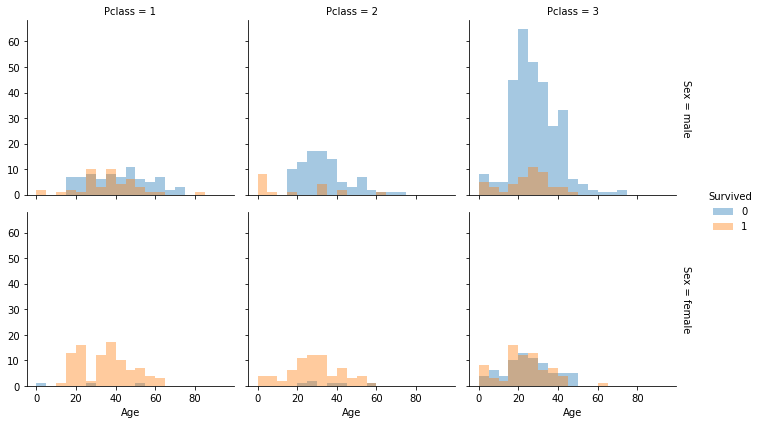

In [23]:
bins = np.arange(0, 100, 5)
g = sb.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sb.distplot, 'Age', kde=False, bins=bins,)
g.add_legend() ; 
# Here, in legend 0 means not survived and 1 means survived.

Oberservations:
1. Female who are older than 40 and belongs to Pclass 3 has low survival rate
2. Between age 15-35 most passenger were male belonging to Pclass 3

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section my observations are considering the survival rate against gender, age, and Pclass and I observed that :
1. children of pclass 2 have a high survival rate
2. pclass 3 females have low survival rate
3. pclass 3 who has low survival rate, have numbers of male candidates in majority.

### Were there any interesting or surprising interactions between features?

On comparing with my previous oberservations I found that female candidates are having high survival rate but later on it was not true. The survival rate of female candidates is different for every different pclass.
Also earlier I found teens and adults have low survival rate but later on I found that the children of pclass 1 and 2 are having high survival rate.